# Running Time and Optimization of the Dijkstra's Algorithm

Now that you have become familiar with jupyter notebooks, and the fundamental graph algorithms used in Networking, we shall introduce two important concepts related to implementing algorithms namely time complexity and optimization.


## Fetching required modules

Before, we get started lets import code modules which would make us focus on understanding the Dijkstra's shortest path algorithm.

In [1]:
import os, sys
from os.path import dirname, join, abspath
import warnings
warnings.filterwarnings('ignore')

sys.path.insert(0, abspath(join(dirname("modules"), '..')))
from modules.create_graph import *
from modules.visualize_graph import *

<a class="anchor" id="setup1"></a>
## Building the graph 

This is a sample graph that will be used by us for the entire notebook. You are free to add (or) change the number of nodes, and edges. Typically, both nodes and edges can contain information. For example in a typical home network the nodes represent the network components_that can be named like 'home router' (or) 'switch' and the edges represents the distance between the network components.In our implementation of creating a graph, you can also pass an additional data parameter which allows the nodes in the graphs to hold additional data. 

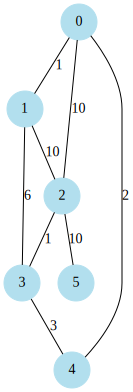

In [2]:
a = Node()
b = Node()
c = Node()
d = Node()
e = Node()
f = Node()
g = Node()

graphs = Graph.createGraph([a, b, c, d, e, f], directed=False)


graphs.add_Edge(a,b,1)
graphs.add_Edge(a,c,10)
graphs.add_Edge(a,e,2)
graphs.add_Edge(b,c,10)
graphs.add_Edge(b,d,6)
graphs.add_Edge(c,d,1)
graphs.add_Edge(c,f,10)
graphs.add_Edge(d,e,3)


visualizeGraph(graphs, "optimizingDijkstra")

<a class="anchor" id="runningTime"></a>
## Running Time comparison

### What is time complexity for an algorithm?
The time complexity is a computational measure to evaluate the performance of an algorithm based on the time it takes for the algorithm to run. Thus,a high level abstract definition for the time complexity of an algorithm is the product of the primary operational steps in the algorithm and the time the algorithm takes to complete each of these steps, under the consideration that these steps are running in fixed time.

### Computing the time complexity for the Dijkstra's algorithm
Based on the definition of time complexity in the previous section, we can compute the time complexity for the Dijkstra's algorithm based on the following primary operational steps. To recap, Dijkstra's algorithm is a greedy algorithm which computes the shortest path by taking edges with the minimum distance to reach any node on the graph. Thus, the running time for the Dijkstra's algorithm is computed with respect to the number of node (|V|) and the number of edges (|E|) on the graph.

The primary operational steps in Dijkstra's algorithm are:
 - Extracting the node from the list of previously unvisited nodes in the Graph 
 - In the current iteration of the algorithm, finding a previously unvisited node with the minimum distance, `min_node`.
 - Finding the nodes adjacent to the `min_node`, and update the distance to the adjacent nodes with respect to the source node.

Thus, we can generalize the expression to compute the time complexity for the Dijkstra's algorithm as $$O(|E|\cdot T_{\mathrm {dk} }+|V|\cdot T_{\mathrm {em} })$$ where $T_{\mathrm {dk}}$ represents the time complexity of removing the current seen node and $T_{\mathrm {em}}$ represents the time complexity for removing the node which has the minimum distance. 


In addition to the above primary operational steps of the algorithm, the time complexity is also affected by the data structure used to store (or) represent the graph. The adjacency matrix representation is a square matrix of dimension ($|V|* |V|$) and the other representation for graphs is the adjacency list, where we represent th

    

The running time of the Dijkstra's algorithm is computed with respect to the number of nodes (|V|) and number of edges (|E|) on the graph. However, the perforamnce or running time of the Dijkstra's algorithm is determined by the data strucutre that is used to implement the set of unvisited nodes. The upper bound of the Dijkstra's algorithm can be simply approximated as $O(|V|^2)$, however, this approximation is an over-simplified expression. **[Why this estimate? For a person reading this for the first time it is not evident how we arrive at this estimate for time complexity. Explain how we arrive to this time complexity]**

Depending on the implementation of the set of univisited nodes, the running time expression for the Dijkstra's algorithm can be $O(|E|\cdot T_{\mathrm {dk} }+|V|\cdot T_{\mathrm {em} })$ where $T_{\mathrm {dk}}$ represents the time complexity of removing the current seen node and $T_{\mathrm {em}}$ represents the time complexity for removing the node which has the minimum distance. 

While using the adjacency matrix representation, the time complexity for removing the node with the minimum distance can be defined as the time taken to perform a linear search across all the unvisited nodes, and so, the running time is represented as $O(|E|+|V|^2) = O(|V|^2)$ **[More exaplanation would help]**. For a dense graph that is represented as an adjacency list, the running time can be represented as $O((|V|^2) log(V))$ **[Again why? evert statement should be explainable]**

When the graph is sparse i.e. the graph has fewer than $|V|^2$ edges, **[NV- Max number of edges is  $|V^2-V|< |V|^2$ so from this definition all graphs are sparse]** Dijkstra's algorithm can be implemented efficiently using adjacency lists for representing the graph and min-heaps for extracting the nodes with minimum distance in each iteration. In our implementaiton, the min-heap is implemented using the [`heapq package`](https://docs.python.org/3.6/library/heapq.html) which takes $O(log(E))$ to pop (or) remove the node with minimum distance from the heap and it takes $O((|V|) log(V))$ **[NV - refrence to the claim]** to build the heap. Thus, the total running time for the implementation with the `heapq pacakge` is $O((|E| + |V|) log(V))$.

**Note**: It is possible to improve the efficiency of the algorithm using [Fibonacci heaps](https://en.wikipedia.org/wiki/Fibonacci_heap) and [Binary Heaps](https://en.wikipedia.org/wiki/Binary_heap) which are not discussed in this notebook. It is also recommended to refer the [A* algorithm](https://en.wikipedia.org/wiki/A*_search_algorithm) 

### Summary of running time

|                | Adjacency Matrix | Adjacency Lists | Priority Queue | Binary Min Heap | Fibonacci Heap |
|----------------|------------------|-----------------|----------------|-----------------|----------------|
| Extracting Min |                  |                 |                |                 |                |
|                |                  |                 |                |                 |                |
|                |                  |                 |                |                 |                |

<a class="anchor" id="optimization"></a>
## Optimizing using adjacency list representation and priority queues

Now that we have clear distinction that adjacency list representation offers a better algorithmic performance over adjacency matrix. We would like to see if we could optimize the algorithmic performance of our implementation of the Dijkstra's Shortest Path algorithm.

### Why optimize?
Dijkstra's shortest path is already a greedy algorithm which saves computation and time, since in every iteration of the algorithm, we find the node with smallest distance before making our next greedy decision. This decision-making step ensures that not every possible source-destination combination is checked in order to determine the shortest path.

In our implementation of the Dijkstra's algorithm, so far, we search through a list, `queue` based on the values of `dist`. The maximum length of `queue` is the number of nodes$(n)$ in the graph, therefore iterating along the `queue` takes $O(n)$ time. Since, we terminate only when all the nodes are visited, that is the length of `seen` set is the number of nodes in the graph, we are doing the $O(n)$ operation of iterating through the nodes n-times, making the total running time of our implementation to become $O(n^2)$. Now, if we look at our graph representation, we use an adjacency matrix, which means to find the connections (or) the edges for a particular node, we iterate through the entire matrix row which has the length equal to the number of nodes in the graph. This adds another $O(n)$ time while iteration while looping through each node in the graph.


### Optimization Steps
1. Instead of iterating through the entire row of the adjacency matrix representation of the graph to find the nodes adjacent to the current node at $O(n)$ time, we use the adjacency list representation which could reduce the time to find adjacent nodes to $O(k)$ where `k` refers to the number of edges for the node.
2. Instead of maintaining a list of nodes and iterating over them at $O(n)$ time, we can use a [Binary Heap](https://medium.com/cantors-paradise/dijkstras-shortest-path-algorithm-in-python-d955744c7064)
 which helps to find the node with the minimum distance at $O(log(n))$ or use a [Fibonacci Heap](https://ieeexplore.ieee.org/document/715934) which will make the task to find the nodes with minimum distance at $O(1)$ time.

<a class="anchor" id="heaps"></a>
### What are Heaps?
Heaps are binary trees where every parent node has a value less than or equal to any of its children. In other words, this type of queue keeps track of the minimum value. Thus it helps retrieve the minimum value at all times. For this reason, it is also referred to as min heap. Thus, position 0 holds the smallest/minimum value. There is also a max heap whose operation is quite similar.

**Note:** heap queues or priority queues don’t sort lists in ascending order. It just keeps the smallest element in its 0th position. The rest of the elements may or may not be sorted.[1](https://www.pythoncentral.io/priority-queue-beginners-guide/).

In this notebook, we shall only look at heaps as efficient data strucutres to build priority queues, but you can read more about heaps on these articles from [tutorialspoint.com](https://www.tutorialspoint.com/data_structures_algorithms/heap_data_structure.htm) and [hackerearth.com](https://www.hackerearth.com/practice/data-structures/trees/heapspriority-queues/tutorial/) to get some more insights on the heap data structure.

<a class="anchor" id="pseudocode2"></a>
### How the current algorithm changes?
**Using Priority Queues:** Now, we are using heaps to implement priority queues because heaps effficiently handle situations of removing the node with the highest priority. In the context of Dijkstra's algorithm, the highest priority is the smallest distance computed to visit the remaining unvisited nodes. Instead of iterating over a list to find the node with minimum distance, we use the heap where the node with the minimum distance is already ready. After removing this node from the heap, the heap re-arranges itself based on the "heap property". 

**Updated Pseudocode:**
Dijkstra's algorithm is optimized by using a min-priority queue. The reason for selecing a min-priority queue is because, the greedy condition of the algorithm selects the edge with the minimum distance. 

<pre>1  <b>function</b> Dijkstra(<i>Graph</i>, <i>source</i>):
2    dist[<i>source</i>] ← 0 <i>// Initialization</i>
3    create node priority queue Q
4
5   <b>for each</b> node <i>v</i> in <i>Graph</i>:           
6       <b>if</b> <i>v</i> ≠ <i>source</i>
7           dist[<i>v</i>] ← INFINITY <i>// Unknown distance from source to v</i>
8       prev[<i>v</i>] ← UNDEFINED <i>// Predecessor of v</i>
9
10      <i>Q</i>.add_with_priority(<i>v</i>, dist[<i>v</i>])
11
12   <b>while</b> <i>Q</i> is not empty: <i>// The main loop</i>
13         <i>u</i> ← <i>Q</i>.extract_min() <i>// Remove and return best node</i>
14         <b>for each</b> neighbor <i>v</i> of <i>u</i>: <i>// only v that are still in Q</i>
15             <i>alt</i> ← dist[<i>u</i>] + length(<i>u</i>, <i>v</i>) 
16             <b>if</b> <i>alt</i> &lt; dist[<i>v</i>]
17                 dist[<i>v</i>] ← <i>alt</i>
18                 prev[<i>v</i>] ← <i>u</i>
19                 <i>Q</i>.decrease_priority(<i>v</i>, <i>alt</i>)
20
21     <b>return</b> dist, prev
</pre>

In [3]:
from heapq import heapify, heappush, heappop

def makePath(node, path):
    if node.previous:
        path.append(node.previous.index)
        makePath(node.previous, path)  

    return path


def dijkstraHeap(graph, source, target):

    nodeList = graph.get_allNodes()
    graph.set_distance(source, 0)

    sourceIndex = graph.get_nodeIndex(source)
    targetIndex = graph.get_nodeIndex(target)

    distance = {sourceIndex: 0}
    queue = [(distance[sourceIndex], sourceIndex)]
    heapify(queue)

    path = []
    path.append(targetIndex)

    while(queue):
        try:
            (minDistance, minIndex) = heappop(queue)
            if minIndex == targetIndex: 
                break


            for (nextIndex, weight) in graph.get_connections(nodeList[minIndex]).items():
                if (nextIndex not in distance) or ((minDistance + weight) < distance[nextIndex]):
                    distance[nextIndex] = minDistance + weight
                    graph.set_distance(nodeList[nextIndex], minDistance + weight)
                    graph.set_previous(nodeList[nextIndex], nodeList[minIndex])
                    heappush(queue, (nodeList[nextIndex].distance, nodeList[nextIndex].index))  
        except ValueError:
            break
            
    shortestPathNodes = makePath(target, path)
    shortestPathEdges = []

    for i in range(len(shortestPathNodes)):
        try:
            weight = graph.get_edgeWeight(shortestPathNodes[i], shortestPathNodes[i+1])
            shortestPathEdges.append([shortestPathNodes[i], shortestPathNodes[i+1], weight])
        except IndexError:
            break

    return(shortestPathNodes, shortestPathEdges, distance)

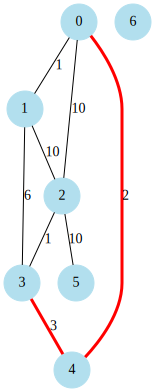

In [4]:
graphs = Graph.createGraph([a, b, c, d, e, f, g], directed=False)


graphs.add_Edge(a,b,1)
graphs.add_Edge(a,c,10)
graphs.add_Edge(a,e,2)
graphs.add_Edge(b,c,10)
graphs.add_Edge(b,d,6)
graphs.add_Edge(c,d,1)
graphs.add_Edge(c,f,10)
graphs.add_Edge(d,e,3)

visualDiGraph = visualizeGraph(graphs, "heapDijkstra")


shortestPathNodes, shortestPathEdges, distance = dijkstraHeap(graphs, a, d)
if shortestPathEdges is not None:
    path = displayPath(shortestPathEdges, "heapDijkstra")
else:
    print(distance)
    
path

<a class="anchor" id="references"></a>
## Reference

- [1] Leiserson, Charles Eric, Ronald L. Rivest, Thomas H. Cormen, and Clifford Stein. Introduction to algorithms. Chapter 24. Vol. 6. Cambridge, MA: MIT press, 2001.
- [2] Dijkstra's Algorithm on [Wikipedia](https://en.wikipedia.org/wiki/Dijkstra%27s_algorithm)
- [3] Micha Shute, Dijkstra's Shortest Path Algorithm in Python on [Medium](https://medium.com/cantors-paradise/dijkstras-shortest-path-algorithm-in-python-d955744c7064)